## Import

In [1]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

## Load the dataset from 'heart.csv' into a Pandas DataFrame

In [2]:
ha_df = pd.read_csv('heart.csv')
ha_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Understanding

In [3]:
# Display the column names in the dataset
ha_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Explanation of all columns in the dataset:

### - 'age': age of the patient
### - 'sex': sex of the patient
### - 'cp': chest pain type (0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic)
### - 'trtbps': resting blood pressure in mm Hg
### - 'chol': cholesterol in mg/dl
### - 'exng': exercise-induced angina (1=yes, 0=no)
### - 'fbs': fasting blood sugar > 120 mg/dl (1=true, 0=false)
### - 'restecg': resting electrocardiographic results (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)
### - 'thalachh': maximum heart rate achieved
### - 'slp': slope
### - 'caa': number of major vessels
### - 'thall': thallium stress test result
### - 'output': target (0=less chance of heart attack, 1=more chance of heart attack)

## Data Preparation

In [4]:
# Check data information, data types, and missing values
ha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### list of categorical columns for value checking 

In [5]:
categoric_cols = ['sex', 'cp', 'fbs', 'restecg',
                  'exng', 'slp', 'caa', 'thall']

In [6]:
# Check all unique values in categorical columns

for i in categoric_cols:
    if i in ha_df.columns:
        print('All values in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

# Print the list of categorical columns
print('Categorical columns:', categoric_cols)

All values in column sex : 
0     96
1    207
Name: sex, dtype: int64


All values in column cp : 
0    143
1     50
2     87
3     23
Name: cp, dtype: int64


All values in column fbs : 
0    258
1     45
Name: fbs, dtype: int64


All values in column restecg : 
0    147
1    152
2      4
Name: restecg, dtype: int64


All values in column exng : 
0    204
1     99
Name: exng, dtype: int64


All values in column slp : 
0     21
1    140
2    142
Name: slp, dtype: int64


All values in column caa : 
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


All values in column thall : 
0      2
1     18
2    166
3    117
Name: thall, dtype: int64


Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']


## Outliers using boxplots and remove data points outside 1.5*IQR

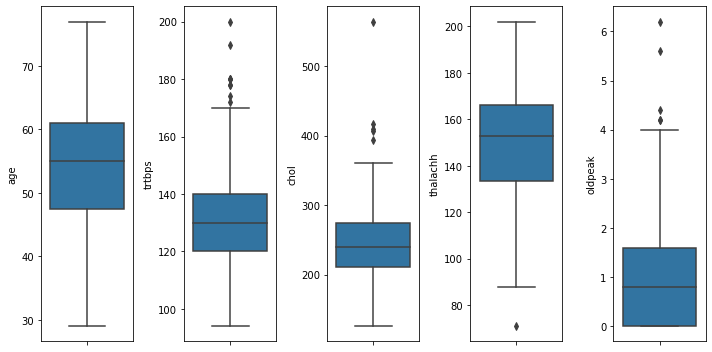

In [7]:
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=ha_df[col_num[i]])
    plt.tight_layout()

In [8]:
for i in col_num:
    Q1 = ha_df[i].quantile(0.25)
    Q3 = ha_df[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    ha_df = ha_df[(ha_df[i] >= LowerBound)&(ha_df[i] <= UpperBound)]

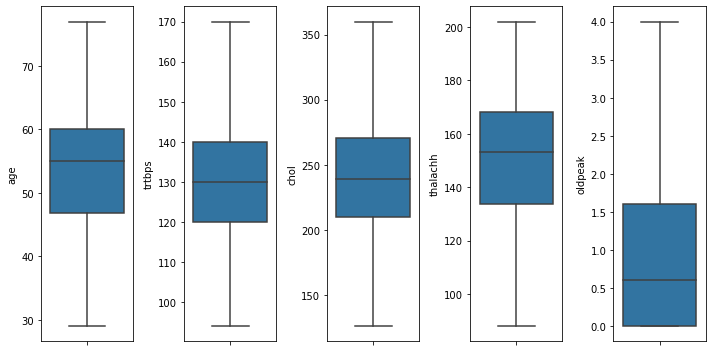

In [9]:
# Check outliers after handling

col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = ha_df[col_num[i]])
    plt.tight_layout()

In [10]:
ha_df.shape

(284, 14)

In [11]:
# Missing values
ha_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
# Duplicate data
ha_df.duplicated().sum()

1

In [13]:
# Remove duplicate rows
ha_df = ha_df.drop_duplicates()

In [14]:
# Check for duplicate data after removal
ha_df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [15]:
# Describe statistics for selected numeric columns
ha_df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
trtbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
thalachh,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


In [16]:
df = ha_df

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Count Plot

In [18]:
# Count plot for categorical columns
count = ['sex', 'cp', 'fbs', 'restecg','exng','slp', 'caa', 'thall', 'output']

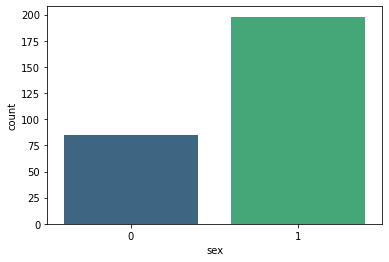

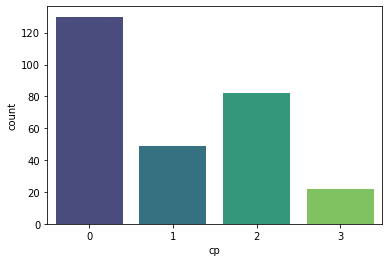

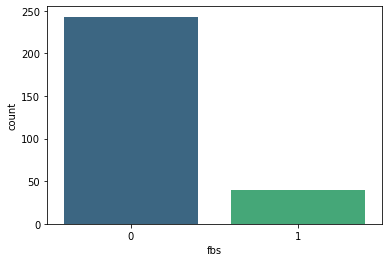

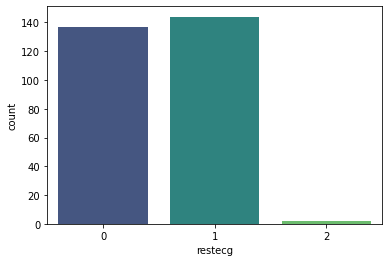

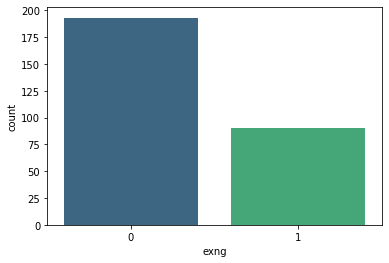

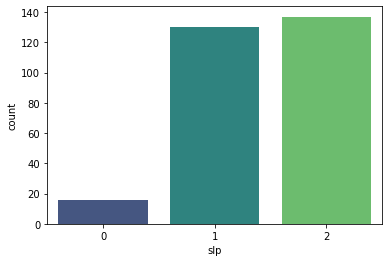

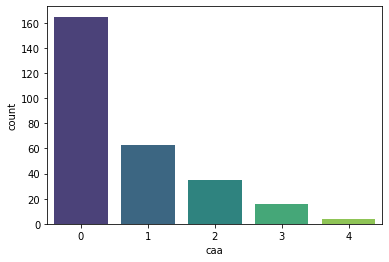

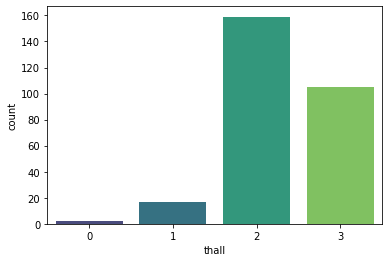

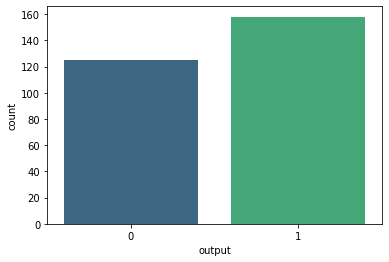

In [19]:
for i in count:
    sns.countplot(df[i], palette = 'viridis')
    plt.show()

## Histograms for selected numeric columns

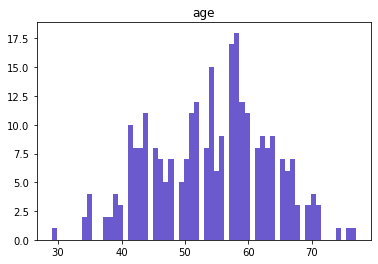

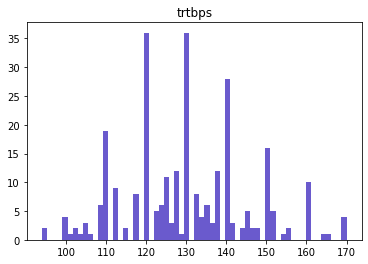

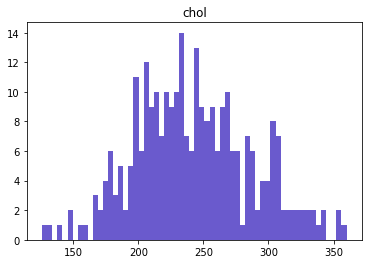

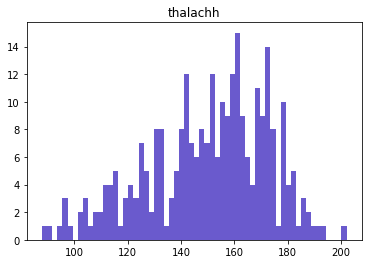

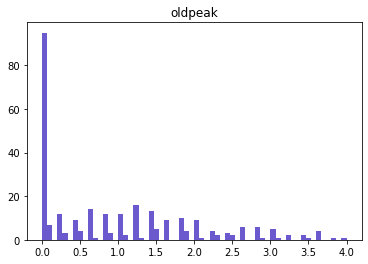

In [20]:
i = ['age', 'trtbps', 'chol','thalachh','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

## Checking for Multicollinearity and Feature Selection

In [21]:
# Import variance_inflation_factor function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)

# Sort and Display the output
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
3,trtbps,67.479395
7,thalachh,49.071486
0,age,41.433818
4,chol,32.397241
12,thall,17.597185
10,slp,10.237501
13,output,4.558433
1,sex,4.022971
9,oldpeak,2.998900
2,cp,2.615809


## Remove columns with VIF greater than the limit (VIF limit = 11)
### This step is repeated for different columns
ha_df.drop(columns=['trtbps'], inplace=True)

In [22]:
# drop column 'trtbps' (vif > 11)
df.drop(columns = ['trtbps'], inplace = True)

In [23]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
6,thalachh,40.229316
3,chol,31.225076
0,age,29.612135
11,thall,17.532569
9,slp,10.231212
12,output,4.558241
1,sex,4.001104
8,oldpeak,2.941578
2,cp,2.596913
5,restecg,2.164959


In [24]:
# drop column 'thalachh' (vif > 11)
df.drop(columns = ['thalachh'], inplace = True)

In [25]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
0,age,28.887183
3,chol,26.287462
10,thall,16.339419
8,slp,9.095234
11,output,4.045895
1,sex,3.765843
7,oldpeak,2.912625
2,cp,2.553355
5,restecg,2.148942
6,exng,2.016190


In [26]:
# drop column 'age' (vif > 11)
df.drop(columns = ['age'], inplace = True)

In [27]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
2,chol,17.937794
9,thall,15.369374
7,slp,8.911986
10,output,3.937079
0,sex,3.762219
6,oldpeak,2.713075
1,cp,2.532267
4,restecg,2.144378
5,exng,2.007930
8,caa,1.853003


In [28]:
# drop column 'chol' (vif > 11)
df.drop(columns = ['chol'], inplace = True)

In [29]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
8,thall,10.628714
6,slp,7.524873
0,sex,3.757474
9,output,3.713174
5,oldpeak,2.557867
1,cp,2.512613
3,restecg,2.135752
4,exng,1.946123
7,caa,1.828787
2,fbs,1.220503


In [30]:
df.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')

Pearson Correlation,


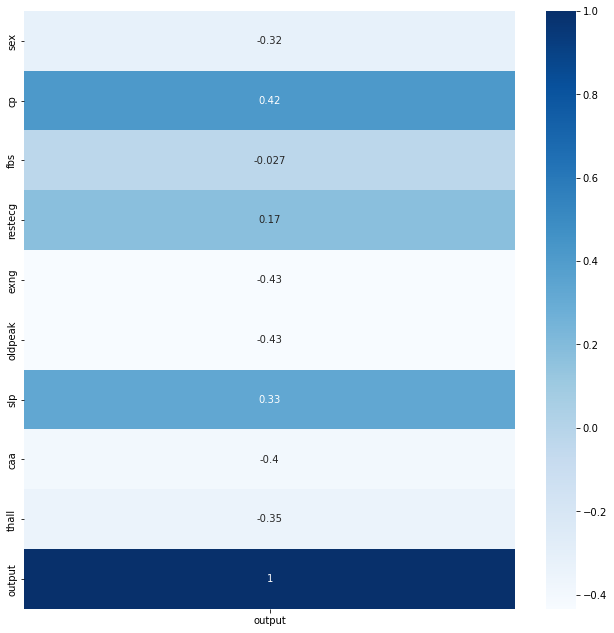

abs corr score: 
sex        0.318896
cp         0.416319
fbs        0.027210
restecg    0.171453
exng       0.431599
oldpeak    0.434108
slp        0.326473
caa        0.397733
thall      0.349150
Name: output, dtype: float64


mean 0.31921551302804485


feature selection result: 
cp         0.416319
exng       0.431599
oldpeak    0.434108
slp        0.326473
caa        0.397733
thall      0.349150
Name: output, dtype: float64


In [31]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['output'][0:-1]))
cor['output'] = cor['output'][0:-1]
margin = abs(cor['output'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['output'][0:-1])[abs(cor['output']) > margin]
print(fs)

In [32]:
df = df.drop(columns = ['sex', 'fbs', 'restecg', 'slp'])

In [33]:
df.columns

Index(['cp', 'exng', 'oldpeak', 'caa', 'thall', 'output'], dtype='object')

In [34]:
df.head()

,cp,exng,oldpeak,caa,thall,output
0,3,0,2.3,0,1,1
1,2,0,3.5,0,2,1
2,1,0,1.4,0,2,1
3,1,0,0.8,0,2,1
4,0,1,0.6,0,2,1


## Train-Test Split

In [35]:
# Define input features and target variable
X = df.drop(columns=['output'])
y = df['output']

# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Hyperparameter Tuning

In [36]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define model parameters for hyperparameter tuning
model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'splitter':['best','random'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    },
    'SVM_Classifier':{
        'model' : SVC(),
        'params':{
            'kernel' : ['rbf','poly','sigmoid','linear'],
            'gamma' : ['scale','auto'],
        }
    }
    }
scores = []

In [37]:
# Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [38]:
# Perform hyperparameter tuning for each model
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [39]:
# Store the results in a DataFrame
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,Logistic_Regression,0.832047,"{'multi_class': 'auto', 'penalty': 'l1', 'solv..."
1,decision_tree,0.827661,"{'criterion': 'entropy', 'max_depth': 5, 'max_..."
2,SVM_Classifier,0.845205,"{'gamma': 'auto', 'kernel': 'rbf'}"


## Modeling

## 1. Logistic Regression

In [40]:
# Select the best parameters for Logistic Regression
best.best_params[0]

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

In [41]:
# Create a Logistic Regression model with the best parameters and fit it to the training data
model = LogisticRegression(solver = 'saga',
                           penalty = 'l1',
                           multi_class = 'auto')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### Evaluation

In [42]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[23  4]
 [ 3 27]]


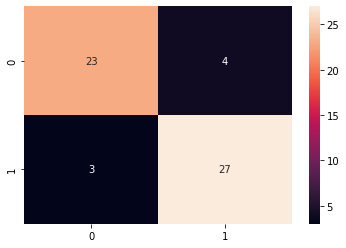

In [43]:
# Plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [44]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# Display the classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.87      0.90      0.89        30

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57



## 2. Decision Tree

In [45]:
# Select the best parameters for Decision Tree
best.best_params[1]

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [46]:
# Create a Decision Tree model with the best parameters and fit it to the training data
model = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 5,
                               max_features = 'log2',
                               splitter = 'best')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### Evaluation

In [47]:
# Display the confusion matrix for Decision Tree
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[19  8]
 [ 4 26]]


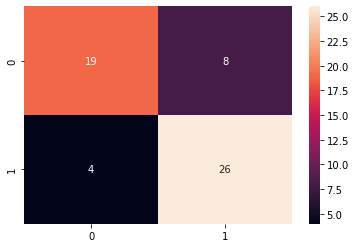

In [48]:
# Plot the confusion matrix for Decision Tree
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [49]:
# Display the classification report for Decision Tree
from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.76      0.87      0.81        30

    accuracy                           0.79        57
   macro avg       0.80      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



## 3. Support Vector Machine (SVM)

In [50]:
# Select the best parameters for SVM
best.best_params[2]

{'gamma': 'auto', 'kernel': 'rbf'}

In [51]:
# Create an SVM model with the best parameters and fit it to the training data
model = SVC(gamma = 'auto', kernel = 'rbf')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### Evaluation

In [52]:
# Display the confusion matrix for SVM
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[20  7]
 [ 2 28]]


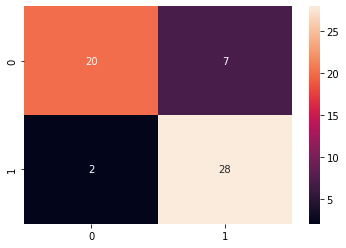

In [53]:
# Plot the confusion matrix for SVM
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [54]:
# Display the classification report for SVM
from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.80      0.93      0.86        30

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.85      0.84      0.84        57

